# **Low Risk Modelling**

## **Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#main
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

#viz
import seaborn as sns 
import matplotlib.pyplot as plt 

#mod
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout 
from sklearn.metrics import mean_absolute_error

## **Data Loading**

In [3]:
list_file = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Dataset/low_risk')
list_file

['Batavia Dana Kas Maxima.csv',
 'BNI AM Dana Likuid.csv',
 'Danamas_rupiah_plus.csv',
 'Danareksa Seruni Pasar Uang II.csv',
 'Danareksa Seruni Pasar Uang III.csv',
 'Manulife_dana_kas_kelas_A.csv',
 'Sucorinvest Sharia Money Market Fund.csv',
 'Bahana Dana Likuid.csv',
 'Sucorinvest Money Market Fund.csv',
 'TRIM Kas 2.csv']

In [4]:
dataset = []
for file in list_file:
  name = file.split('.')[0]
  dataset.append(name)
print(dataset)

['Batavia Dana Kas Maxima', 'BNI AM Dana Likuid', 'Danamas_rupiah_plus', 'Danareksa Seruni Pasar Uang II', 'Danareksa Seruni Pasar Uang III', 'Manulife_dana_kas_kelas_A', 'Sucorinvest Sharia Money Market Fund', 'Bahana Dana Likuid', 'Sucorinvest Money Market Fund', 'TRIM Kas 2']


In [5]:
df = {}
for i in dataset:
  df[i] = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Dataset/low_risk/' +i +'.csv')

In [6]:
df['Manulife_dana_kas_kelas_A'].head()

,Unnamed: 0,date,value,Next,Class
0,0,2022/9/16,1640.75,1641.04,1
1,1,2022/9/19,1641.04,1641.14,1
2,2,2022/9/20,1641.14,1641.24,1
3,3,2022/9/21,1641.24,1641.34,1
4,4,2022/9/22,1641.34,1641.41,1


In [7]:
df['Manulife_dana_kas_kelas_A'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  66 non-null     int64  
 1   date        66 non-null     object 
 2   value       66 non-null     float64
 3   Next        65 non-null     float64
 4   Class       66 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ KB


In [8]:
for i in dataset:
  df[i]['date'] = pd.to_datetime(df[i]['date']) 

In [9]:
df['Manulife_dana_kas_kelas_A'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  66 non-null     int64         
 1   date        66 non-null     datetime64[ns]
 2   value       66 non-null     float64       
 3   Next        65 non-null     float64       
 4   Class       66 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.7 KB


In [10]:
for i in dataset:
  df[i] = df[i].set_index('date')

## **Split train-test**

In [11]:
df_new = {}
for i in dataset:
  size = int(len(df[i]) * 0.8)
  df_new[i] = {}
  df_new[i]['train'] = df[i]['value'].iloc[0:size]
  df_new[i]['test'] = df[i]['value'].iloc[size-1:len(df[i])]

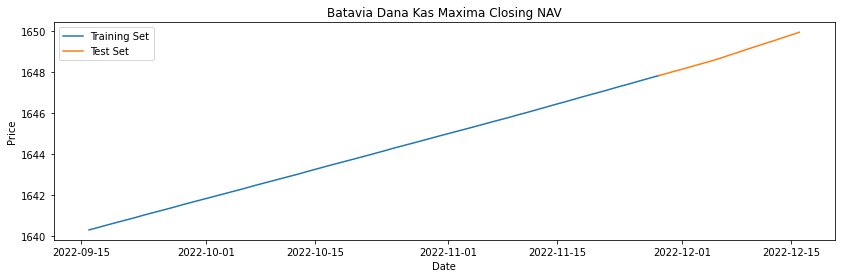

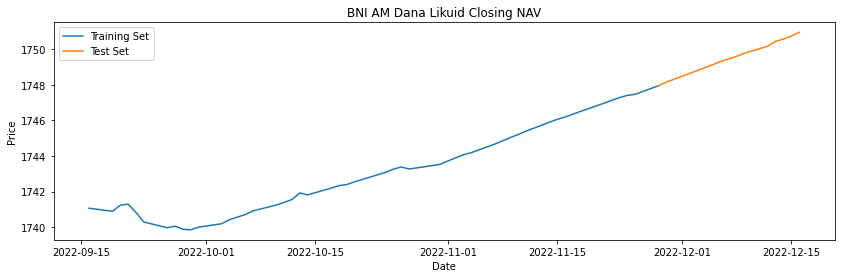

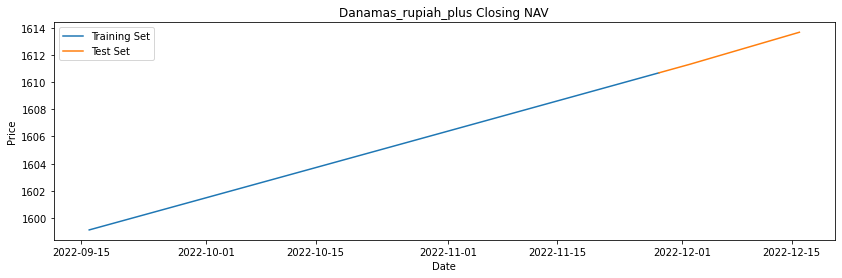

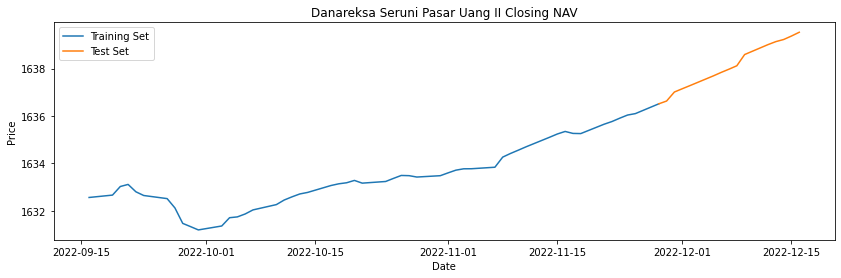

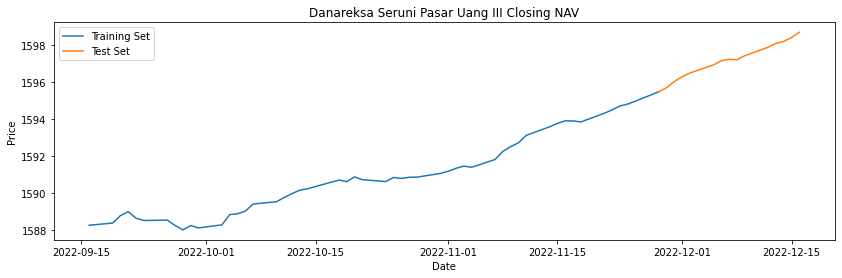

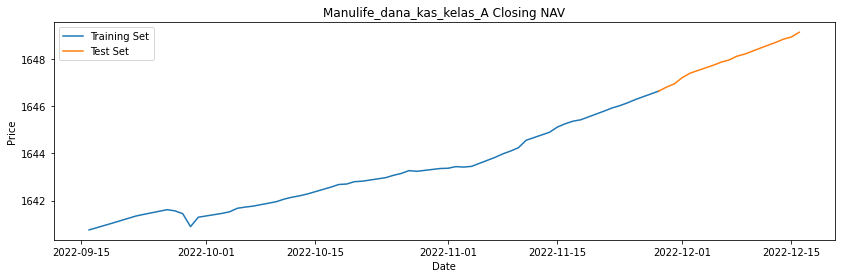

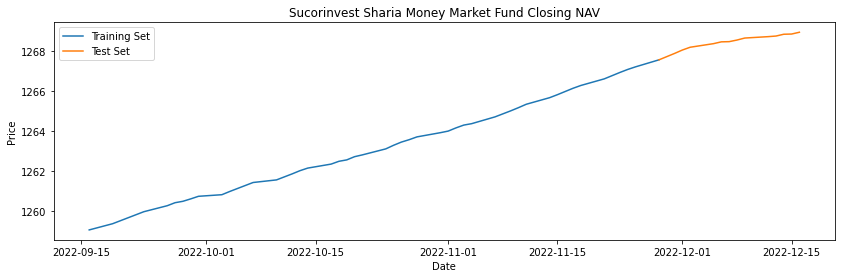

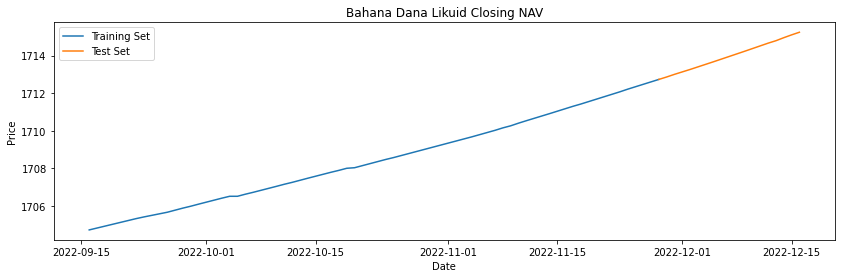

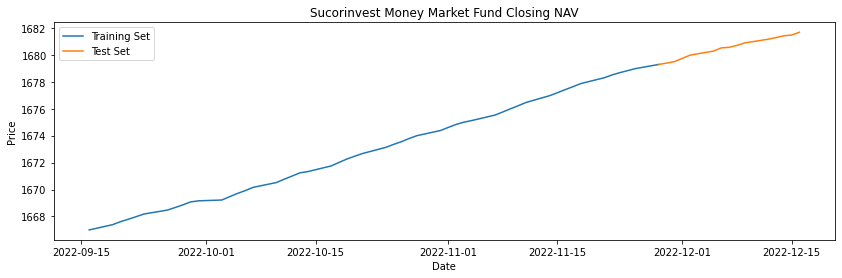

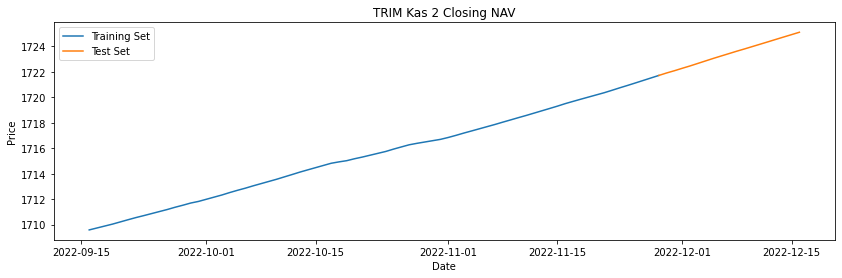

In [12]:
for i in dataset:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["train"])
    plt.plot(df_new[i]["test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing NAV")

## **Scaling**

In [13]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(dataset):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["train"])
    a1 = np.array(df_new[i]["test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [14]:
transform_test["Manulife_dana_kas_kelas_A"].shape

(15, 1)

In [15]:
trainset = {}
testset = {}
for j in dataset:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(1, 48):
        X_train.append(transform_train[j][i-1:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(1,14):
        X_test.append(transform_test[j][i-1:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [16]:
arr_buff = []
for i in dataset:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=dataset)

,X_train,y_train,X_test,y_test
Batavia Dana Kas Maxima,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
BNI AM Dana Likuid,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Danamas_rupiah_plus,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Danareksa Seruni Pasar Uang II,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Danareksa Seruni Pasar Uang III,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Manulife_dana_kas_kelas_A,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Sucorinvest Sharia Money Market Fund,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Bahana Dana Likuid,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Sucorinvest Money Market Fund,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
TRIM Kas 2,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"


## **Model**

In [17]:
from keras.callbacks import EarlyStopping

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.015:
      self.model.stop_training = True

earlystop = EarlyStopping(monitor='val_mae', patience=50)

In [18]:
%%time
# The LSTM architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the RNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

#Training Models
history = {}
for i in dataset:
    print("Train to", i)
    history[i] = model.fit(trainset[i]["X"], 
              trainset[i]["y"], 
              epochs=1000, 
              batch_size=8,
              validation_data=(testset[i]['X'], testset[i]['y']), 
              shuffle=False,
              callbacks=[Callback(), earlystop])

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 14ms/step - loss: 0.0231 - mae: 0.1844 - val_loss: 0.0282 - val_mae: 0.2018
Epoch 846/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0208 - mae: 0.1833 - val_loss: 0.0281 - val_mae: 0.2016
Epoch 847/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0208 - mae: 0.1771 - val_loss: 0.0281 - val_mae: 0.2015
Epoch 848/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0231 - mae: 0.1812 - val_loss: 0.0280 - val_mae: 0.2014
Epoch 849/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0196 - mae: 0.1643 - val_loss: 0.0280 - val_mae: 0.2012
Epoch 850/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0205 - mae: 0.1746 - val_loss: 0.0280 - val_mae: 0.2011
Epoch 851/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0223 - mae: 0.1816 - val_loss: 0.0279 - val_mae: 0.2010
Epoch 852/1000
6/6 [=============

1/1 [==============================] - 0s 42ms/step


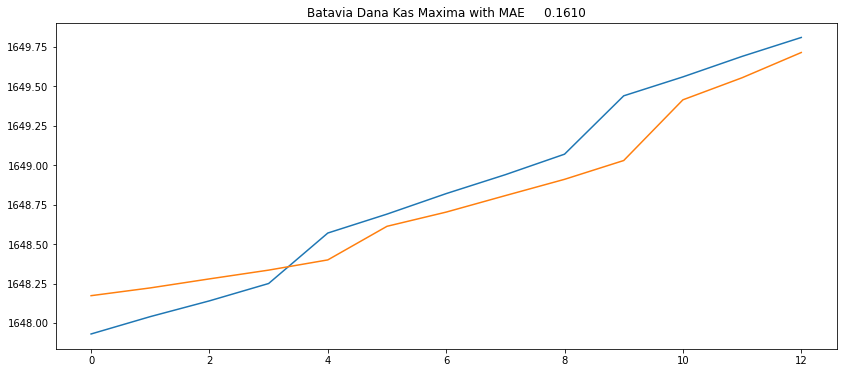

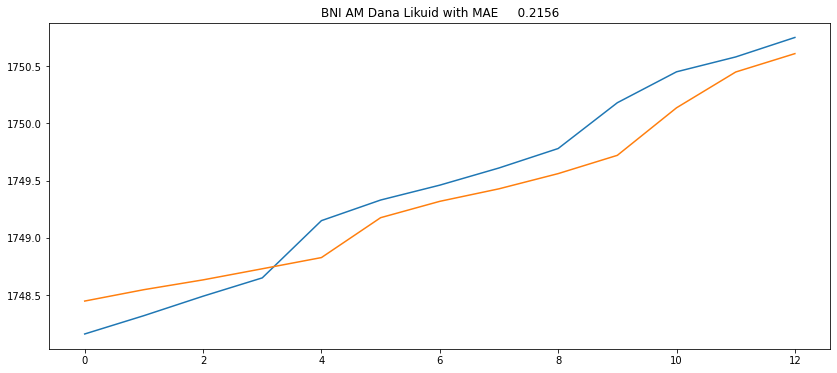

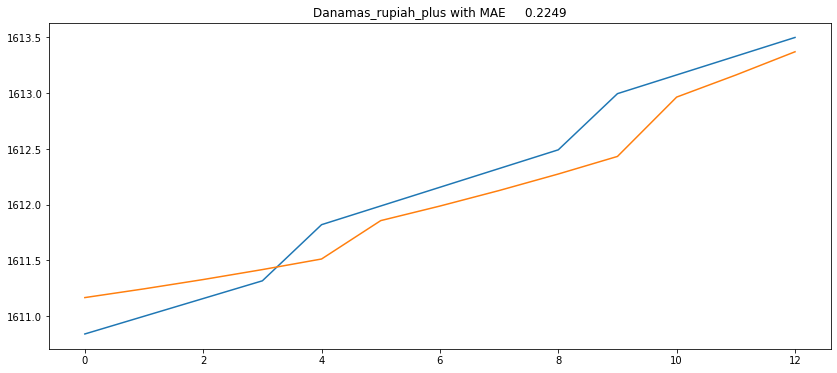

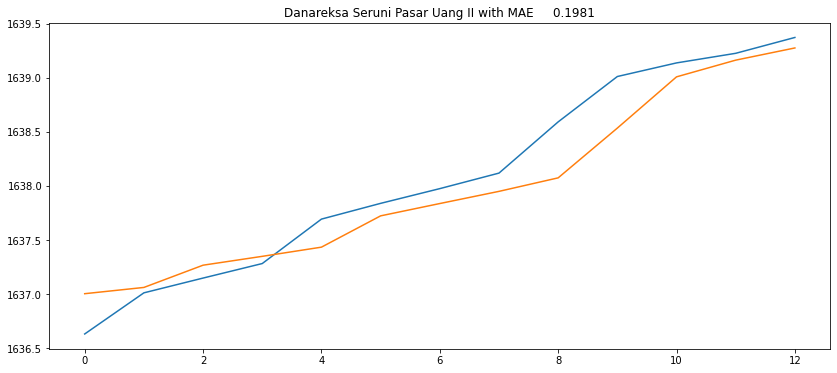

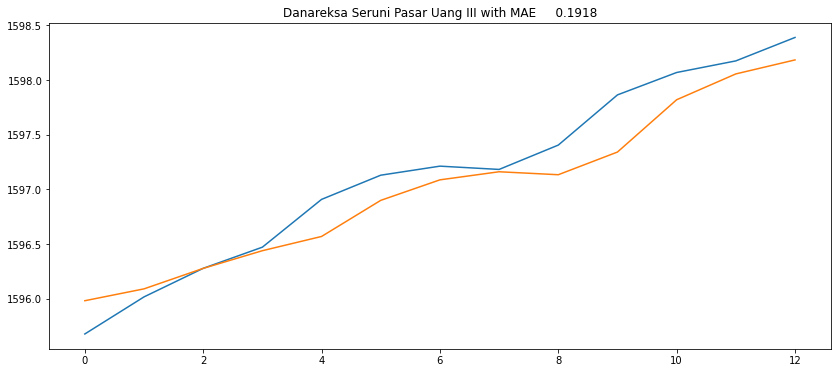

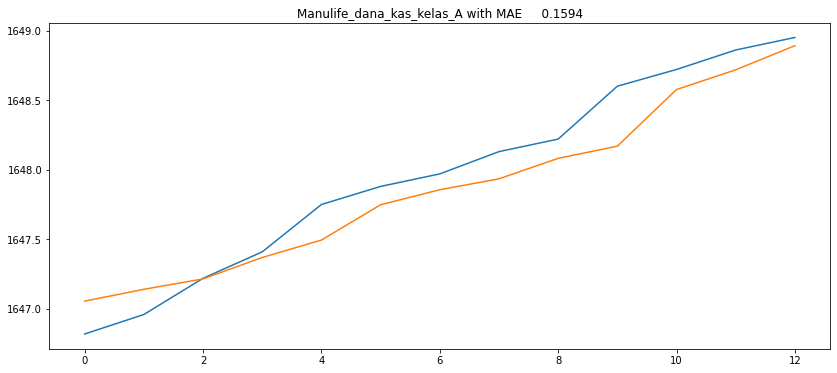

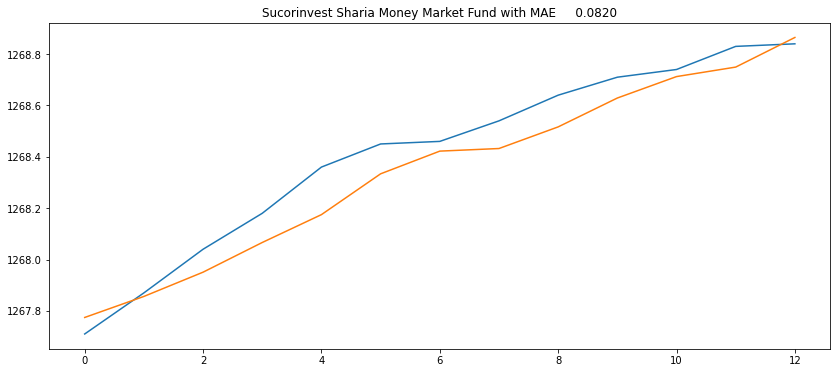

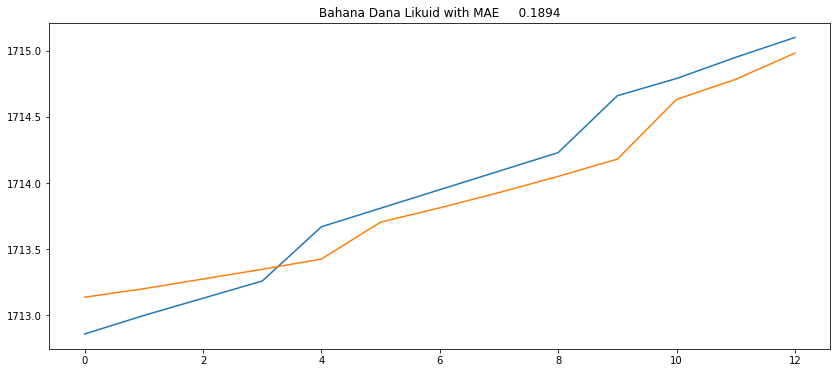

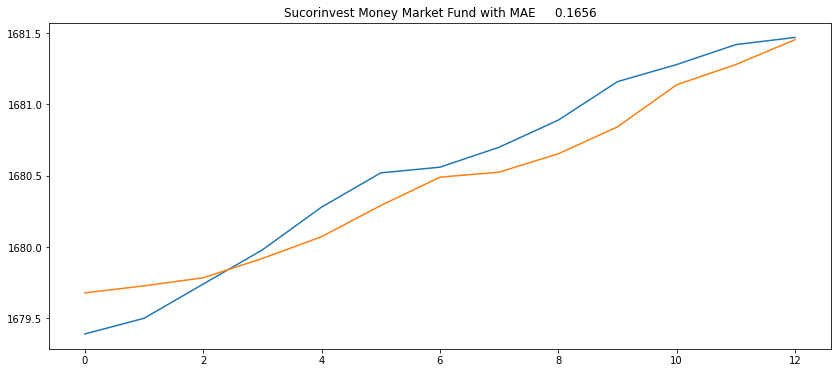

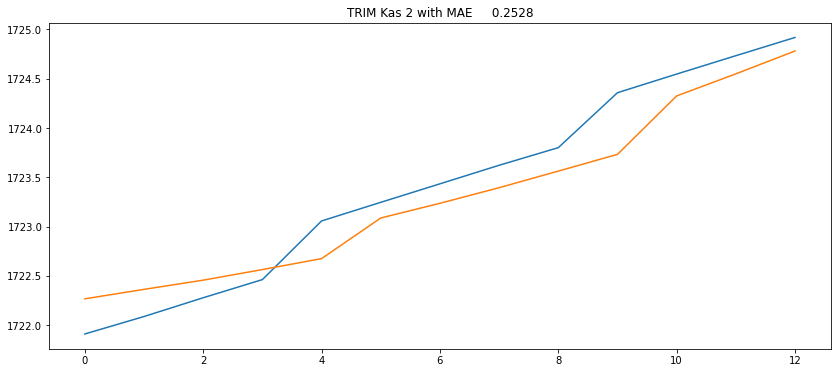

In [19]:
pred_result = {}
for i in dataset:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MSE = mean_absolute_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MAE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)

## **Model Evaluation**

Batavia Dana Kas Maxima - Loss & MAE


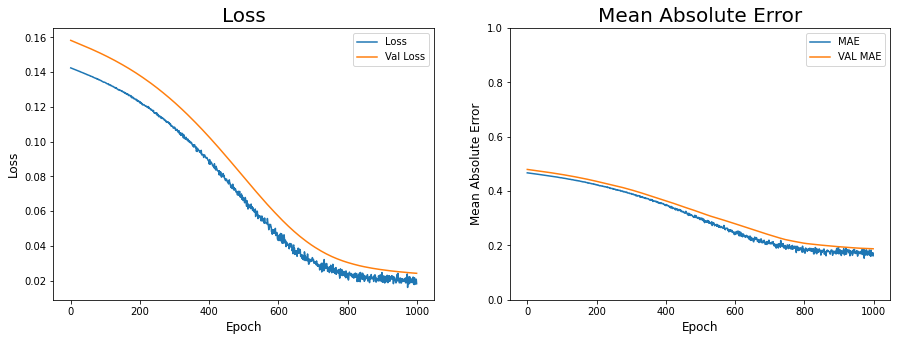

BNI AM Dana Likuid - Loss & MAE


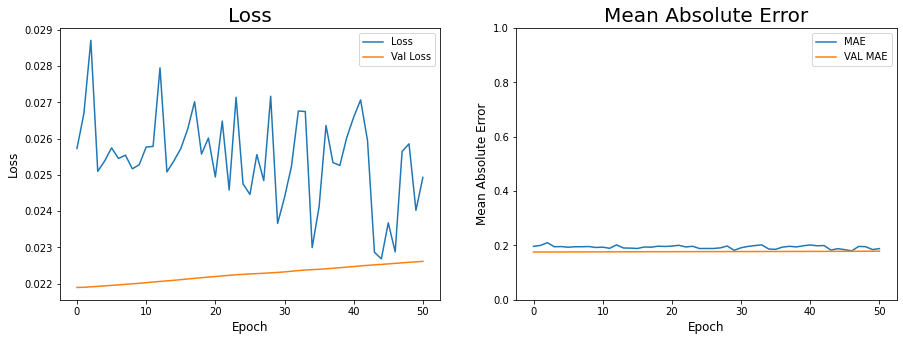

Danamas_rupiah_plus - Loss & MAE


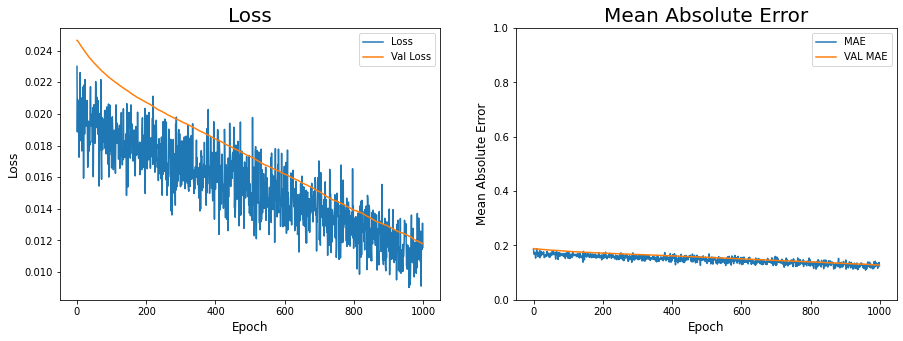

Danareksa Seruni Pasar Uang II - Loss & MAE


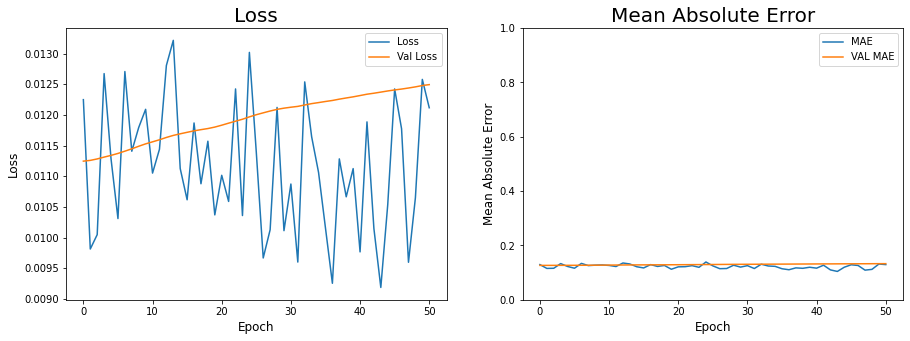

Danareksa Seruni Pasar Uang III - Loss & MAE


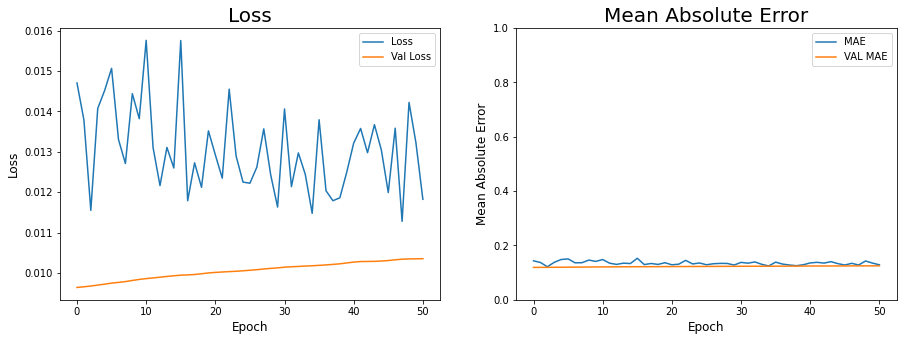

Manulife_dana_kas_kelas_A - Loss & MAE


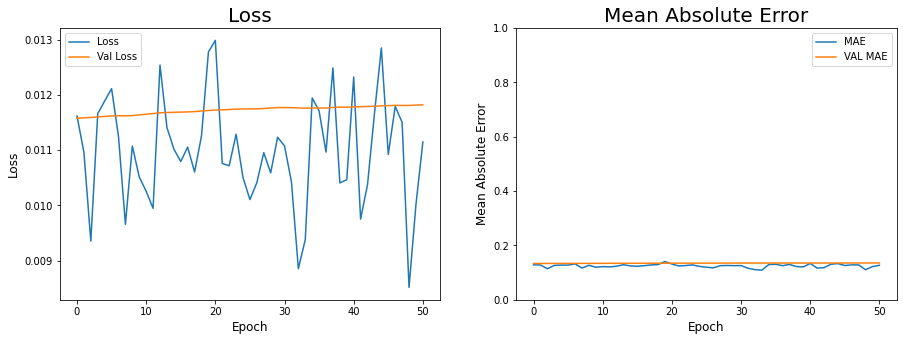

Sucorinvest Sharia Money Market Fund - Loss & MAE


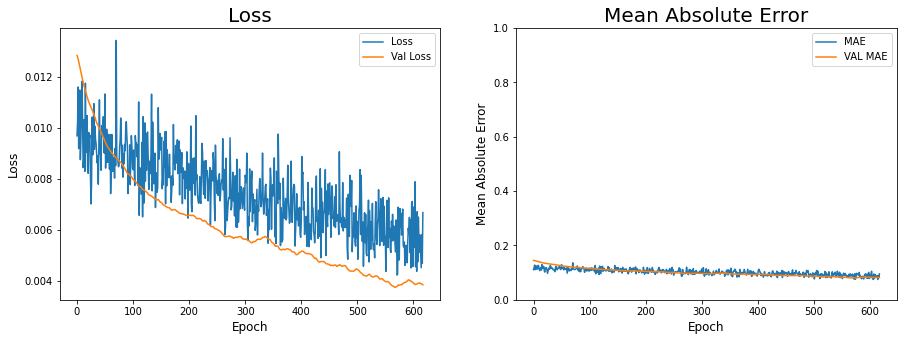

Bahana Dana Likuid - Loss & MAE


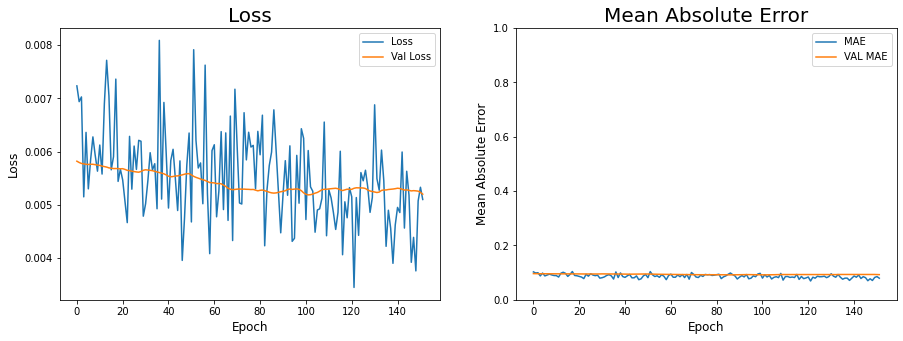

Sucorinvest Money Market Fund - Loss & MAE


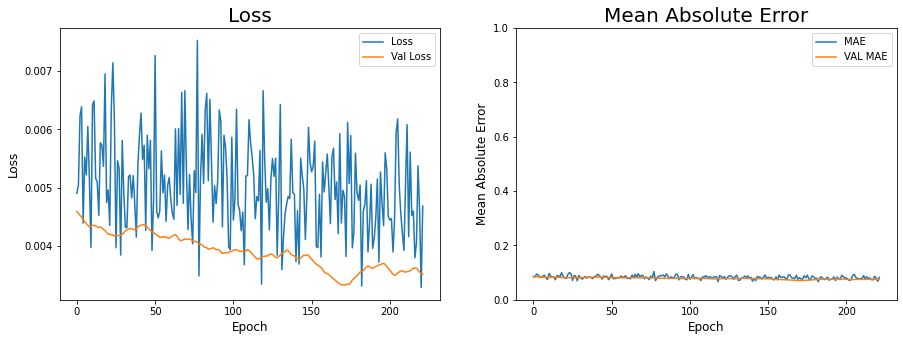

TRIM Kas 2 - Loss & MAE


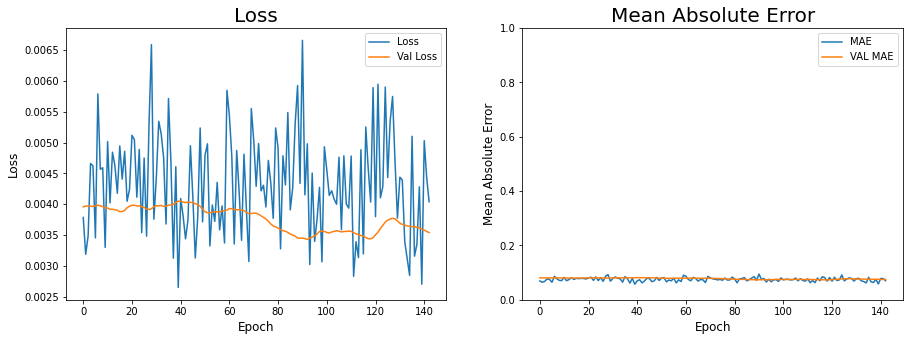

In [20]:
for i in dataset:
  print(i,"- Loss & MAE")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
  ax1.plot(history[i].history['loss'])
  ax1.plot(history[i].history['val_loss'])
  ax1.legend(['Loss','Val Loss'])
  ax2.set_ylim(ymin=0, ymax=0.2)  
  ax1.set_xlabel('Epoch', fontsize=12)
  ax1.set_ylabel('Loss', fontsize=12)
  ax1.set_title('Loss', fontsize=20)

  ax2.plot(history[i].history['mae'])
  ax2.plot(history[i].history['val_mae'])
  ax2.legend(['MAE','VAL MAE'])
  ax2.set_ylim(ymin=0, ymax=1)
  ax2.set_xlabel('Epoch', fontsize=12)
  ax2.set_ylabel('Mean Absolute Error', fontsize=12)
  ax2.set_title('Mean Absolute Error', fontsize=20)
  plt.show()

In [30]:
mae_df = []
for i in dataset:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MAE = mean_absolute_error(y_true, y_pred)
    mae_df.append(MAE)

a = pd.DataFrame(mae_df, columns=['MAE'], index=dataset)
b = a['MAE'].mean()


print(f'Average from all MAE : {b}')
a

1/1 [==============================] - 0s 18ms/step
Average from all MAE : 0.18404783804086702


,MAE
Batavia Dana Kas Maxima,0.160956
BNI AM Dana Likuid,0.215601
Danamas_rupiah_plus,0.224855
Danareksa Seruni Pasar Uang II,0.198107
Danareksa Seruni Pasar Uang III,0.191837
Manulife_dana_kas_kelas_A,0.159420
Sucorinvest Sharia Money Market Fund,0.081983
Bahana Dana Likuid,0.189397
Sucorinvest Money Market Fund,0.165565
TRIM Kas 2,0.252759


In [21]:
from datetime import datetime 
win = 2
out = []
def forecast(day, x):
  data_inf = df[x]['value'].copy()
  for j in range(day):
    X = np.array(data_inf[-2:])
    X = X.reshape(X.shape[0],1)  
    X_scaled = scaler[x].transform(X)
    X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, 1))
    new_idx = datetime(data_inf.index.year[-1], data_inf.index.month[-1], data_inf.index.day[-1]+1)
    xvalue = scaler[x].inverse_transform(model.predict(X_scaled))
    data_inf[new_idx] = np.round(xvalue[1][0])
  return data_inf

## **Next Day**

In [22]:
predictors = {}
npred = {}
for i, val in enumerate(dataset):
  npred = {}
  print(i,"-",val)
  npred = forecast(2, val)
  print(npred[-3:])

0 - Batavia Dana Kas Maxima
1/1 [==============================] - 0s 30ms/step
date
2022-12-16    1649.94
2022-12-17    1650.00
2022-12-18    1650.00
Name: value, dtype: float64
1 - BNI AM Dana Likuid
1/1 [==============================] - 0s 24ms/step
date
2022-12-16    1750.96
2022-12-17    1751.00
2022-12-18    1751.00
Name: value, dtype: float64
2 - Danamas_rupiah_plus
1/1 [==============================] - 0s 23ms/step
date
2022-12-16    1613.6677
2022-12-17    1614.0000
2022-12-18    1614.0000
Name: value, dtype: float64
3 - Danareksa Seruni Pasar Uang II
1/1 [==============================] - 0s 27ms/step
date
2022-12-16    1639.5339
2022-12-17    1640.0000
2022-12-18    1640.0000
Name: value, dtype: float64
4 - Danareksa Seruni Pasar Uang III
1/1 [==============================] - 0s 30ms/step
date
2022-12-16    1598.6725
2022-12-17    1599.0000
2022-12-18    1599.0000
Name: value, dtype: float64
5 - Manulife_dana_kas_kelas_A
1/1 [==============================] - 0s 24ms/step

In [23]:
label = []
percent = []
mf = []
values = []

for i, val in enumerate(dataset):
  npred = {}
  npred = forecast(1, val)

  if npred[-2] <= npred[-1]:
    xy = npred[-1] - npred[-2]
    per = round(xy/npred[-2]*100,2)
    percent.append(per)
    label.append(1)
    mf.append(val)
    values.append(npred[-1])
  else:
    xy = npred[-1] - npred[-2]
    per = round(xy/npred[-2]*100,2)
    percent.append(per)
    label.append(0)
    mf.append(val)
    values.append(npred[-1])

1/1 [==============================] - 0s 24ms/step


In [24]:
outputs = {
    'Mutual_Funds' : mf,
    'Predicted_NAV' : values,
    'Percentage' : percent,
    'Label' : label
}

In [25]:
final_lowrisk = pd.DataFrame(outputs)
final_lowrisk

,Mutual_Funds,Predicted_NAV,Percentage,Label
0,Batavia Dana Kas Maxima,1650.0,0.00,1
1,BNI AM Dana Likuid,1751.0,0.00,1
2,Danamas_rupiah_plus,1614.0,0.02,1
3,Danareksa Seruni Pasar Uang II,1640.0,0.03,1
4,Danareksa Seruni Pasar Uang III,1599.0,0.02,1
5,Manulife_dana_kas_kelas_A,1649.0,-0.01,0
6,Sucorinvest Sharia Money Market Fund,1269.0,0.01,1
7,Bahana Dana Likuid,1715.0,-0.01,0
8,Sucorinvest Money Market Fund,1682.0,0.02,1
9,TRIM Kas 2,1725.0,-0.01,0


In [26]:
final_lowrisk.to_csv('final_lowrisk.csv')

In [27]:
from google.colab import files
files.download('final_lowrisk.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>